In [21]:
import tradingview as tv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def drawdown_scatter(start='2017-01-01', symbol='BTCUSD', step=14, drawdown=-.10):
    df = tv.history.bar1d[start:](symbol).set_index('time')
    intervals = df.loc[::step]
    interval_lows = df.low.rolling(step).min().loc[::step]
    mdd = interval_lows / intervals.open - 1
    cutlosses = mdd < drawdown
    cutloss_points = df.close.loc[cutlosses.reindex(df.index).fillna(False)]
    count = cutlosses.sum()

    fig, ax = plt.subplots(1,1, figsize=(15,12))
    ax.set_title((
        f'All drawdown larger than {abs(drawdown):.1%} within {step} bars '
        f'(sample: {count} / {len(cutlosses)})'))
    ax.plot(df.close)
    ax.scatter(cutloss_points.index, cutloss_points, c='red')

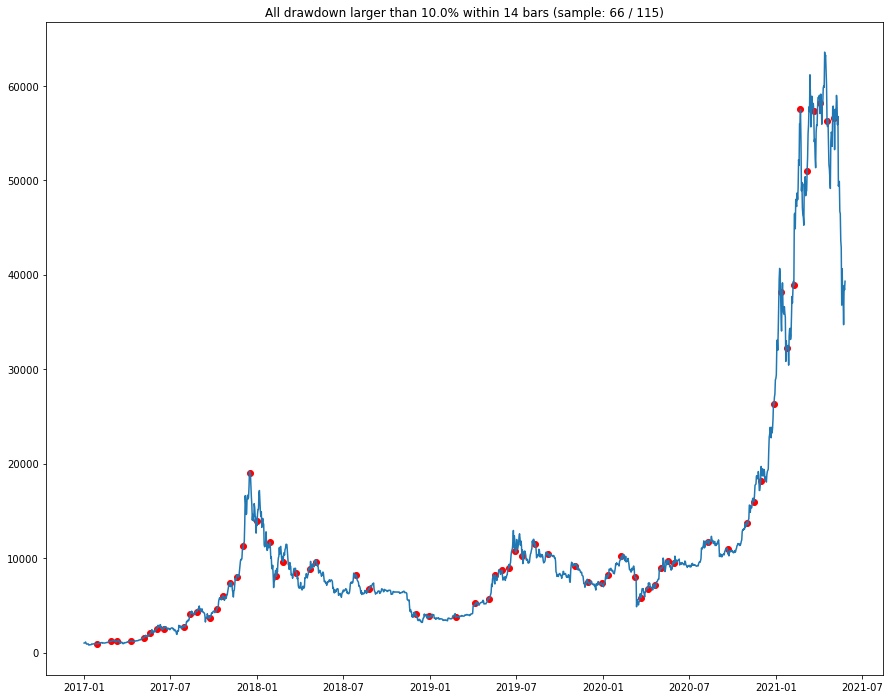

In [35]:
drawdown_scatter(drawdown=-0.1)